In [54]:
import numpy as np
import pandas as pd

product_data = pd.read_csv("product_features_rankBBZ.csv")
product_data.head()


,ItemLookupcode,Product_Line,Item_description,C,G,Ke,Ko,N,O,V,...,Pasta and noodles,Ready to eat meals,Savoury and Salty Snacks,Spreads and Dips,Sweeteners,Supplements and body care,unique_customers,sales,units,sales_rank
0,7817,Swerve - Ultimate Sugar Replacement (Foodservi...,Bulk Granular Sweetener,0,1,1,1,1,0,1,...,0,0,0,0,1,0,19,46168,347,1
1,2392,Nick's Sticks - 100% Grass-Fed Beef Sticks,Grass-Fed Nick's Sticks - Original Beef [25-Pack],0,1,1,0,1,0,0,...,0,0,1,0,0,0,36,34949,465,2
2,8679,Carbquik,Carbquik - Complete Biscuit and Baking Mix,0,0,1,1,0,0,0,...,0,0,0,0,0,0,45,27776,2057,3
3,2920,SmartSweets - Stevia-Sweetened Gummy Bears,Stevia-Sweetened Sweet Fish - Berry [12-Pack],1,1,1,0,1,0,1,...,0,0,0,0,0,0,44,22389,746,4
4,912,Anthony's Goods,Organic Oat Fibre,0,1,1,0,1,1,1,...,0,0,0,0,0,0,50,21727,2171,5


In [55]:
product_data.groupby('Product_Line')['sales'].mean().head()

Product_Line
 The GFB - Bars                                                  109.800000
 The GFB - Bites                                                 209.500000
Anthony's Goods                                                 4913.214286
BUFF - Artisan Bison Sticks                                     5352.500000
Blowholes - Eco-Friendly Paper Straws (Individually Wrapped)       7.000000
Name: sales, dtype: float64

In [56]:
product_data.groupby('Product_Line')['sales'].mean().sort_values(ascending=False).head()

Product_Line
Carbquik                                                  27776.0
Nick's Sticks - 100% Grass-Fed Beef Sticks                24156.0
Swerve - Ultimate Sugar Replacement (Foodservice Size)    22643.0
SmartSweets - Stevia-Sweetened Gummy Bears                16119.0
Krisda - Zero Sugar Chocolate Chips (Retail Size)         15735.0
Name: sales, dtype: float64

In [57]:
product_data.groupby('Product_Line')['sales'].count().sort_values(ascending=False).head()

Product_Line
Flavorall - Alcohol-Free Liquid Stevia                          25
Anthony's Goods                                                 14
True Citrus - Crystallized Citrus                               11
Hot Mamas - Low Sodium, Non-Irradiated Spices and Spice Rubs     9
Handfuel                                                         9
Name: sales, dtype: int64

In [58]:
Product_mean_count = pd.DataFrame(product_data.groupby('Product_Line')['sales'].mean())

In [59]:
Product_mean_count['sales_counts'] = pd.DataFrame(product_data.groupby('Product_Line')['sales'].count())

In [60]:
Product_mean_count.head()

,sales,sales_counts
Product_Line,,
The GFB - Bars,109.800000,5
The GFB - Bites,209.500000,6
Anthony's Goods,4913.214286,14
BUFF - Artisan Bison Sticks,5352.500000,2
Blowholes - Eco-Friendly Paper Straws (Individually Wrapped),7.000000,2


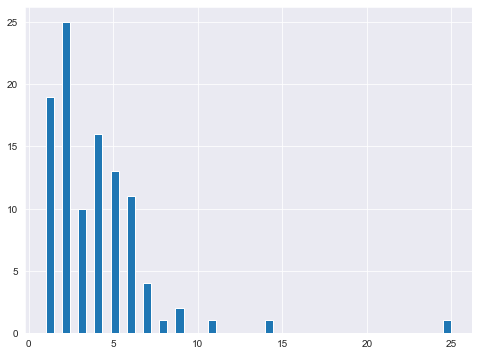

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
Product_mean_count['sales_counts'].hist(bins=50)

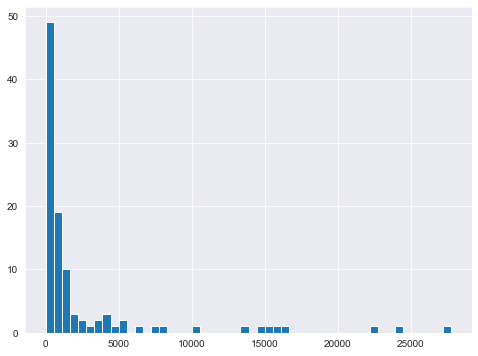

In [62]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
Product_mean_count['sales'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

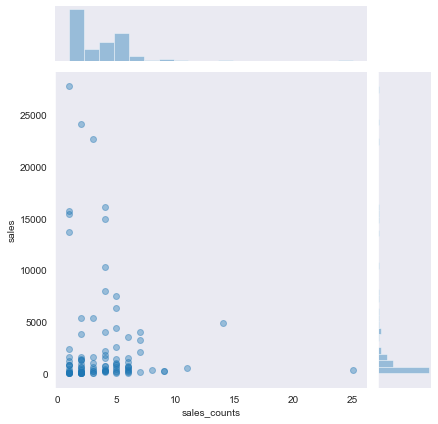

In [71]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='sales_counts', y='sales', data=Product_mean_count, alpha=0.4)

In [72]:
user_sales = product_data.pivot_table(index='ItemLookupcode', columns='Product_Line', values='sales_rank')


In [84]:
user_sales.head()

Product_Line,The GFB - Bars,The GFB - Bites,Anthony's Goods,BUFF - Artisan Bison Sticks,Blowholes - Eco-Friendly Paper Straws (Individually Wrapped),Carbquik,Chase Cocktail Mixer,Chickapea Pasta - Organic Chickpea and Lentil Pasta,Chickapea Pasta - Organic Chickpea and Lentil Pasta with Vegan Sauce,Codeco Nutrition - Camu,...,hOMe Grown Living Foods - Keto U-Bake Cookie Mix,hOMe Grown Living Foods - Keto U-Bake Pizza Crust Mix,hOMe Grown Living Foods - Keto U-Bake Veggie Burger Mix,love good fats - Boxes of 4 Keto Bars,love good fats - Boxes of 4 Plant-Based Keto Bars,love good fats - Fats Shakes,love good fats - Trays of 12 Chewy-Nutty Keto Bars,love good fats - Trays of 12 Keto Bars,love good fats - Trays of 12 Plant-Based Keto Bars,love good fats - Variety Packs of 12 Keto Bars
ItemLookupcode,,,,,,,,,,,,,,,,,,,,,
0233U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0234U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0235U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
Handfuel= user_sales['Handfuel']

In [82]:
Handfuel.head()

ItemLookupcode
0233U   NaN
0234U   NaN
0235U   NaN
1040U   NaN
1070    NaN
Name: Handfuel, dtype: float64